In [182]:
import pandas as pd
import numpy as np
from copy import copy, deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# 2 year and 5 year bond yield changes data set for 3 months => 22*3 = 66 days yield changes
#mean, std of 2 year is 2%,0.5%, 5 year is 2.5%, 1%
#correlation is 0.7
# covariance is 0.7*0.5*1 1e-4 = 0.35e-4
C = [[0.000025, 0.000035], [0.000035, 0.00001]]
mu_two, sigma_two = 0.02, 0.005
mu_five, sigma_five = 0.025, 0.01

two_year_yields = np.random.normal(mu_two, sigma_two, 66)
dummy_two_year_yields = np.random.normal(mu_two, sigma_two, 66)
five_year_yields = two_year_yields * 0.7 + dummy_two_year_yields*np.sqrt(0.51)






In [38]:
np.corrcoef(two_year_yields,five_year_yields)

array([[1.        , 0.73295571],
       [0.73295571, 1.        ]])

In [47]:
yields = pd.DataFrame(np.array([two_year_yields, five_year_yields]).transpose(), columns =['2Y', '5Y'])

In [52]:
yield_changes = yields.diff(axis=0).fillna(method='bfill')

In [56]:
yield_changes.cov()

,2Y,5Y
2Y,0.000046,0.000037
5Y,0.000037,0.000056


In [127]:
def get_variance_before_and_after(mat):
    cov_mat = mat.cov()
    eig_val_1, eig_vec_1 = np.linalg.eig(cov_mat)
    print(np.sort(eig_val_1)[::-1])
    new_mat = np.matmul(mat, eig_vec_1)
    eig_val_2, eig_vec_2 = np.linalg.eig(new_mat.cov())
    print(np.sort(eig_val_2)[::-1])
    return eig_vec_1

In [128]:
eig_vec = get_variance_before_and_after(yield_changes)


[8.80478907e-05 1.36367939e-05]
[8.80478907e-05 1.36367939e-05]


In [257]:
def create_xy_df(arr):
    df = pd.DataFrame(arr.reshape(2,1)*np.linspace(-0.05,0.05,100))
    new_df = df.transpose()
    new_df.columns = ['x', 'y']
    return new_df

In [258]:
axis_1 = create_xy_df(eig_vec[:,0])
axis_2 = create_xy_df(eig_vec[:,1])


In [252]:
pd.DataFrame(eig_vec[0].reshape(2, 1)*np.array([1, 2, 3])).transpose()

,0,1
0,-0.754917,-0.655821
1,-1.509833,-1.311641
2,-2.264750,-1.967462


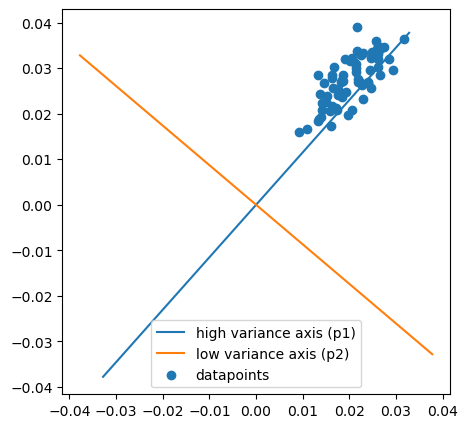

In [262]:
plt.figure(figsize=(5, 5))
plt.plot(axis_2['x'], axis_2['y'])
plt.plot(axis_1['x'], axis_1['y'])
plt.scatter(yields['2Y'], yields['5Y'])
plt.legend(['high variance axis (p1)', 'low variance axis (p2)', 'datapoints'])
plt.savefig('eigen_vector.png')

In [222]:
axis_1.loc[::3,:]

,x,y
0,0.037746,-0.032791
3,0.035458,-0.030804
6,0.033171,-0.028816
9,0.030883,-0.026829
12,0.028595,-0.024842
15,0.026308,-0.022854
18,0.024020,-0.020867
21,0.021732,-0.018880
24,0.019445,-0.016892
27,0.017157,-0.014905


In [223]:
axis_2.loc[::3,:]

,x,y
0,0.032791,0.037746
3,0.030804,0.035458
6,0.028816,0.033171
9,0.026829,0.030883
12,0.024842,0.028595
15,0.022854,0.026308
18,0.020867,0.024020
21,0.018880,0.021732
24,0.016892,0.019445
27,0.014905,0.017157


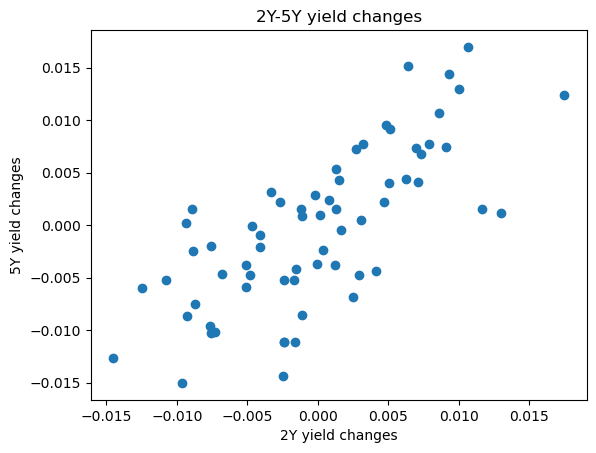

In [245]:
plt.scatter(yield_changes.loc[:,"2Y"],yield_changes.loc[:,"5Y"], marker='o')
plt.xlabel('2Y yield changes')
plt.ylabel('5Y yield changes')
plt.title('2Y-5Y yield changes')
plt.savefig('two_five_yield_changes.png')

In [249]:
yield_changes.to_csv('yield_changes.csv', index=False)

In [248]:
yield_changes.reset_index(drop=True)

,2Y,5Y
0,-0.002429,-0.011151
1,-0.002429,-0.011151
2,0.010033,0.012967
3,-0.003336,0.003179
4,-0.009664,-0.015029
...,...,...
61,-0.014513,-0.012683
62,0.007868,0.007749
63,0.001207,-0.003759
64,-0.008867,-0.002468
